<a href="https://colab.research.google.com/github/Programmer-Develops/weather-data-analysis/blob/main/weather_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weatherHistory.csv')

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

if 'Loud Cover' in df.columns:
    df = df.drop(columns=['Loud Cover'])

df = df.dropna(subset=['Precip Type'])

df = df[df['Pressure (millibars)'] > 0]

df = df.set_index('Formatted Date')

df.to_csv('cleaned_weather_data.csv')
print("Data cleaned and saved.")

Data cleaned and saved.


In [3]:
daily_data = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']].resample('D').mean()

monthly_data = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']].resample('M').mean()

corr_matrix = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']].corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                       Temperature (C)  Humidity  Wind Speed (km/h)  \
Temperature (C)              1.000000 -0.632669           0.009531   
Humidity                    -0.632669  1.000000          -0.223892   
Wind Speed (km/h)            0.009531 -0.223892           1.000000   
Pressure (millibars)        -0.310364  0.038655          -0.255257   

                      Pressure (millibars)  
Temperature (C)                  -0.310364  
Humidity                          0.038655  
Wind Speed (km/h)                -0.255257  
Pressure (millibars)              1.000000  


/tmp/ipython-input-1221662605.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']].resample('M').mean()


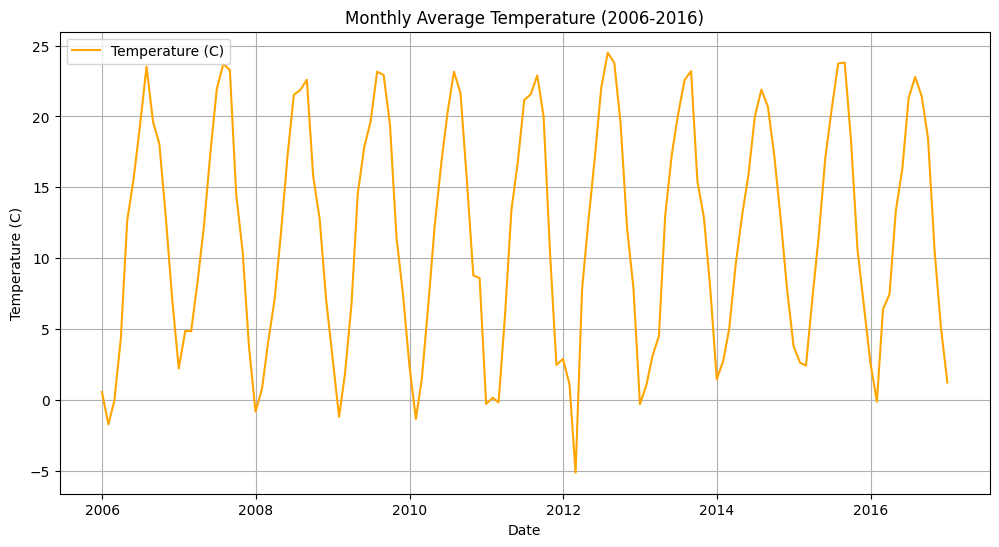

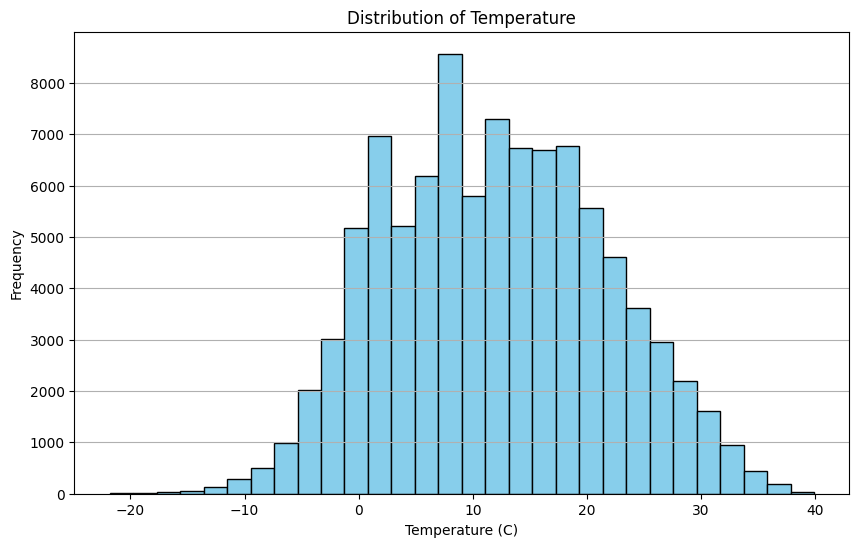

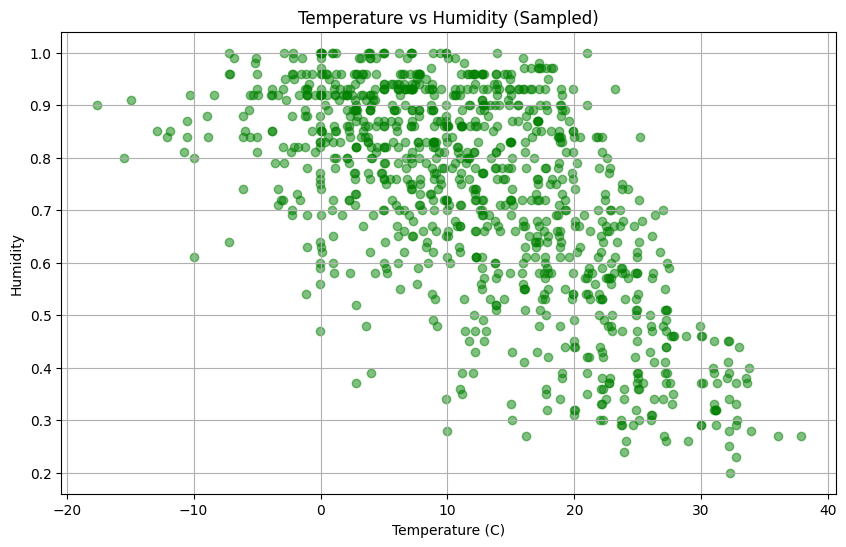

/tmp/ipython-input-2831200844.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_app_temp = df['Apparent Temperature (C)'].resample('M').mean()


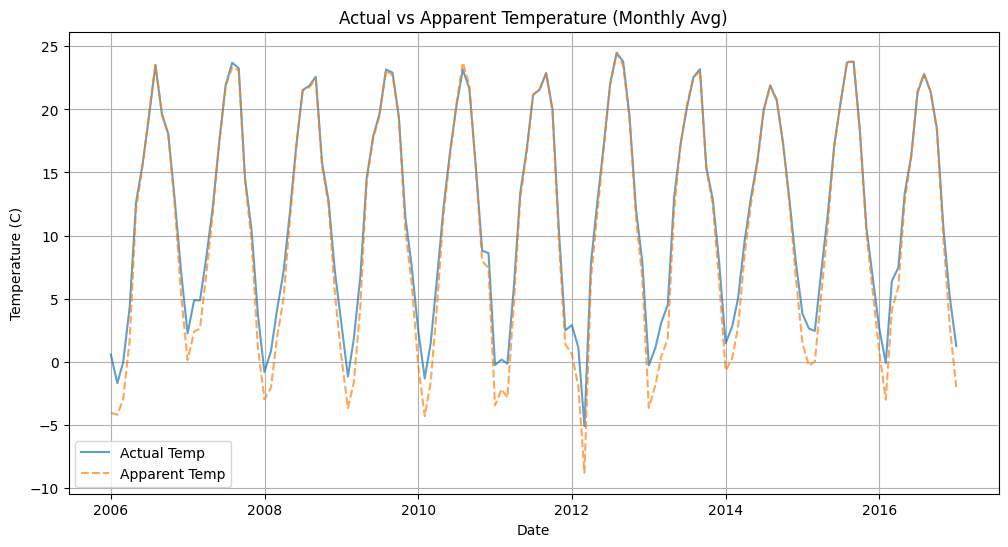

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Temperature (C)'], label='Temperature (C)', color='orange')
plt.title('Monthly Average Temperature (2006-2016)')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.grid(True)
plt.savefig('monthly_temp_trend.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Temperature (C)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.savefig('temp_distribution.png')
plt.show()

sample_df = df.sample(n=1000, random_state=42)
plt.figure(figsize=(10, 6))
plt.scatter(sample_df['Temperature (C)'], sample_df['Humidity'], alpha=0.5, color='green')
plt.title('Temperature vs Humidity (Sampled)')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig('temp_vs_humidity.png')
plt.show()

monthly_app_temp = df['Apparent Temperature (C)'].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Temperature (C)'], label='Actual Temp', alpha=0.7)
plt.plot(monthly_data.index, monthly_app_temp, label='Apparent Temp', alpha=0.7, linestyle='--')
plt.title('Actual vs Apparent Temperature (Monthly Avg)')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_apparent.png')
plt.show()